In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


背景介绍
新型冠状病毒感染的肺炎疫情爆发后，对人们的生活产生很大的影响。
当前感染人数依然在不断变化。每天国家卫健委和各大新闻媒体都会公布疫情的数据，包括累计确诊人数、现有确诊人数等。
本案例使用python对新冠肺炎的数据（韩国）进行分析。

读取数据集

In [2]:
patientdata=pd.read_csv("D:360Downloads\PatientInfo.csv")
region=pd.read_csv("D:360Downloads\Region.csv")

## Task1

## 数据预处理

查看数据前五行

In [3]:
patientdata.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


检测数据缺失值

In [4]:
patientdata.isnull().sum()


patient_id               0
global_num            1160
sex                     94
birth_year             464
age                    105
country                 90
province                 0
city                    76
disease               3110
infection_case         819
infection_order       3097
infected_by           2393
contact_number        2539
symptom_onset_date    2682
confirmed_date           0
released_date         2147
deceased_date         3072
state                    0
dtype: int64

In [5]:
na_ratio = pd.DataFrame(patientdata.isnull().sum()/len(patientdata)*100,columns=['NA_Ratio'])
p_na = na_ratio[na_ratio['NA_Ratio']>0].sort_values(by = 'NA_Ratio', ascending=False)

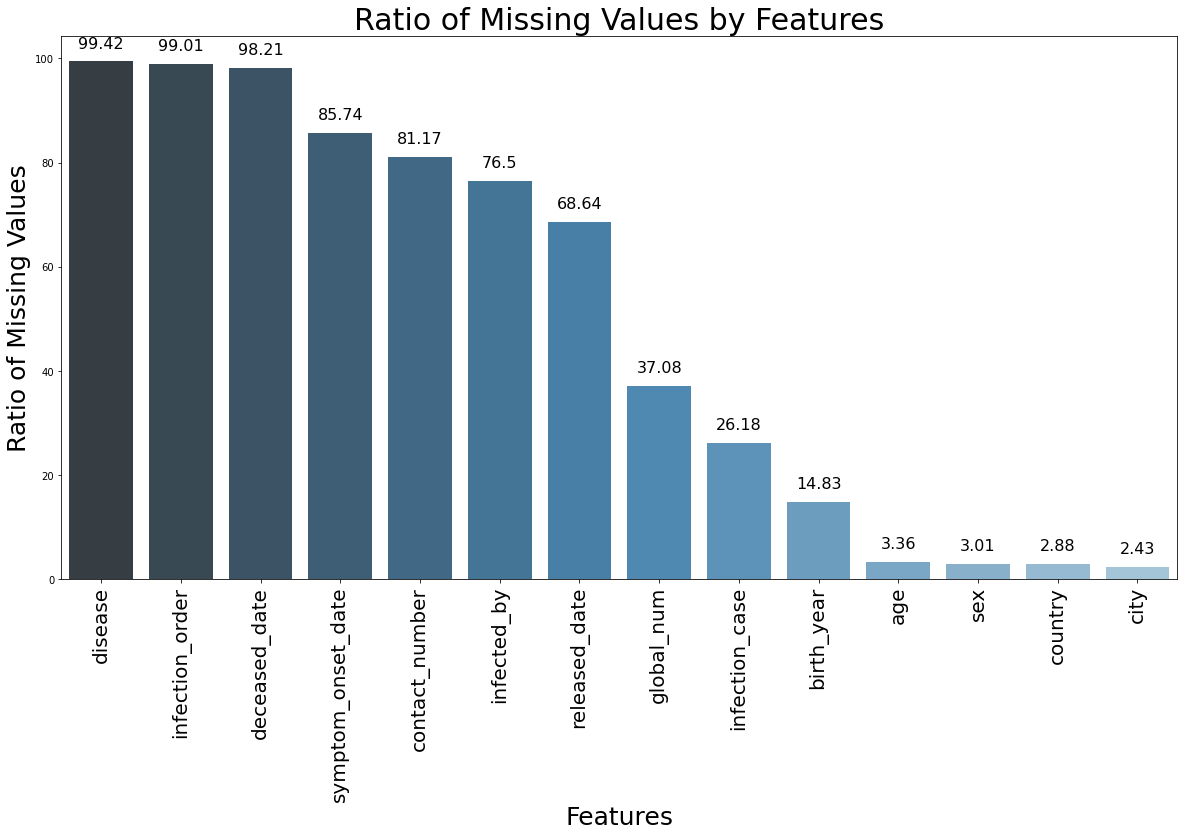

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
nar = sn.barplot(x=p_na.index, y=p_na['NA_Ratio'],orient='v',palette="Blues_d")
ax.set_xticklabels(p_na.index, rotation=90, fontsize=20)
ax.set_ylabel('Ratio of Missing Values', fontsize=25)
ax.set_xlabel('Features', fontsize=25)
ax.set_title('Ratio of Missing Values by Features', fontsize=30)
for loc, value in zip(ax.patches, p_na.NA_Ratio):
    ax.text(loc.get_x()+loc.get_width()/2, loc.get_height()+2, round(value,2),ha='center', va='bottom',fontsize=16)
plt.show()

我们对于图表当中缺失的特征值进行处理

我们对于'disease' 'infected_by''symptom_onset_date''deceased_date''released_date',NaN表示没有这个特征，可以将NaN用None代替。

In [7]:
none_col=['disease', 'infected_by','symptom_onset_date','deceased_date','released_date']
patientdata[none_col]=patientdata[none_col].fillna('None')

对于'contact_number'用平均值填补

In [8]:
patientdata['contact_number'].fillna(patientdata['contact_number'].mean(),inplace=True)

对于'country''city''province''infection_case''age''sex''birth_year'采用众数填补

In [9]:
patientdata['city'].fillna(patientdata['city'].mode()[0],inplace=True)
patientdata['country'].fillna(patientdata['country'].mode()[0],inplace=True)
patientdata['infection_case'].fillna(patientdata['infection_case'].mode()[0],inplace=True)
patientdata['age'].fillna(patientdata['age'].mode()[0],inplace=True)
patientdata['sex'].fillna(patientdata['sex'].mode()[0],inplace=True)
patientdata['birth_year'].fillna(patientdata['birth_year'].mode()[0],inplace=True)


去除无用特征ID,因为global_num以及infection_order缺失的比例过大，考虑删除这两个特征,因为age和bitrhyear有多重共线性，只考虑birthyear，删除age


In [10]:
patientdata.drop('patient_id',axis=1,inplace=True)
patientdata.drop('global_num',axis=1,inplace=True)
patientdata.drop('infection_order',axis=1,inplace=True)
patientdata.drop('age',axis=1,inplace=True)


再次查看缺失，确认已完成缺失值处理

In [11]:
patientdata.isnull().sum()

sex                   0
birth_year            0
country               0
province              0
city                  0
disease               0
infection_case        0
infected_by           0
contact_number        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
dtype: int64

region中，将kindergarden，elementary_school_count,university_count加在一起，用education_healthy_facilities表示

In [12]:
region['education_healthy_facilities']=region['kindergarten_count']+region['elementary_school_count']+region['university_count']
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,education_healthy_facilities
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,1485
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,71
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,59
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,35
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,93


将region的数据导入patientdata中，作为patient新的特征列

In [13]:

def getRegion(dataframe,dR):
    
    dataframe['education_healthy_facilities']=0
    dataframe['latitude']=0
    dataframe['longitude']=0
    dataframe['academy_ratio']=0
    dataframe['elderly_population_ratio']=0
    for i in dataframe.index:
        for j in dR.index:
        
            if dataframe.loc[i,'city']==dR.loc[j,'city']:
                dataframe.loc[i,'latitude']=dR.loc[j,'latitude']
                dataframe.loc[i,'longitude']=dR.loc[j,'longitude']
                dataframe.loc[i,'education_healthy_facilities']=dR.loc[j,'education_healthy_facilities']
                dataframe.loc[i,'academy_ratio']=dR.loc[j,'academy_ratio']
                dataframe.loc[i,'elderly_population_ratio']=dR.loc[j,'elderly_population_ratio']
           
    return dataframe               

In [14]:
getRegion(patientdata,region)


,sex,birth_year,country,province,city,disease,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,education_healthy_facilities,latitude,longitude,academy_ratio,elderly_population_ratio
0,male,1964.0,Korea,Seoul,Gangseo-gu,None,overseas inflow,None,75.0,2020-01-22,2020-01-23,2020-02-05,None,released,38,35.212424,128.980680,1.43,11.84
1,male,1987.0,Korea,Seoul,Jungnang-gu,None,overseas inflow,None,31.0,None,2020-01-30,2020-03-02,None,released,55,37.606832,127.092656,0.70,16.65
2,male,1964.0,Korea,Seoul,Jongno-gu,None,contact with patient,2.002e+09,17.0,None,2020-01-30,2020-02-19,None,released,33,37.572999,126.979189,1.71,18.27
3,male,1991.0,Korea,Seoul,Mapo-gu,None,overseas inflow,None,9.0,2020-01-26,2020-01-30,2020-02-15,None,released,48,37.566283,126.901644,1.83,14.05
4,female,1992.0,Korea,Seoul,Seongbuk-gu,None,contact with patient,1e+09,2.0,None,2020-01-31,2020-02-24,None,released,84,37.589562,127.016700,1.02,16.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,female,1995.0,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,20.0,None,2020-03-24,None,None,isolated,240,33.488936,126.500423,1.53,15.10
3124,male,1995.0,United States,Jeju-do,Jeju-do,None,overseas inflow,None,23.0,None,2020-03-24,None,None,isolated,240,33.488936,126.500423,1.53,15.10
3125,female,1996.0,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,26.0,None,2020-03-25,None,None,isolated,240,33.488936,126.500423,1.53,15.10
3126,female,1995.0,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,25.0,None,2020-03-27,None,None,isolated,240,33.488936,126.500423,1.53,15.10


查看特征类型

In [15]:
type_p=patientdata.columns.groupby(patientdata.dtypes)
[(i,len(type_p[i]),type_p[i]) for i in type_p]

[(dtype('int64'), 1, Index(['education_healthy_facilities'], dtype='object')),
 (dtype('float64'),
  6,
  Index(['birth_year', 'contact_number', 'latitude', 'longitude',
         'academy_ratio', 'elderly_population_ratio'],
        dtype='object')),
 (dtype('O'),
  12,
  Index(['sex', 'country', 'province', 'city', 'disease', 'infection_case',
         'infected_by', 'symptom_onset_date', 'confirmed_date', 'released_date',
         'deceased_date', 'state'],
        dtype='object'))]

可以知道数值特征有6个，非数值特征有12个

首先对数值型特征去除异常值

首先，对异常值进行查看

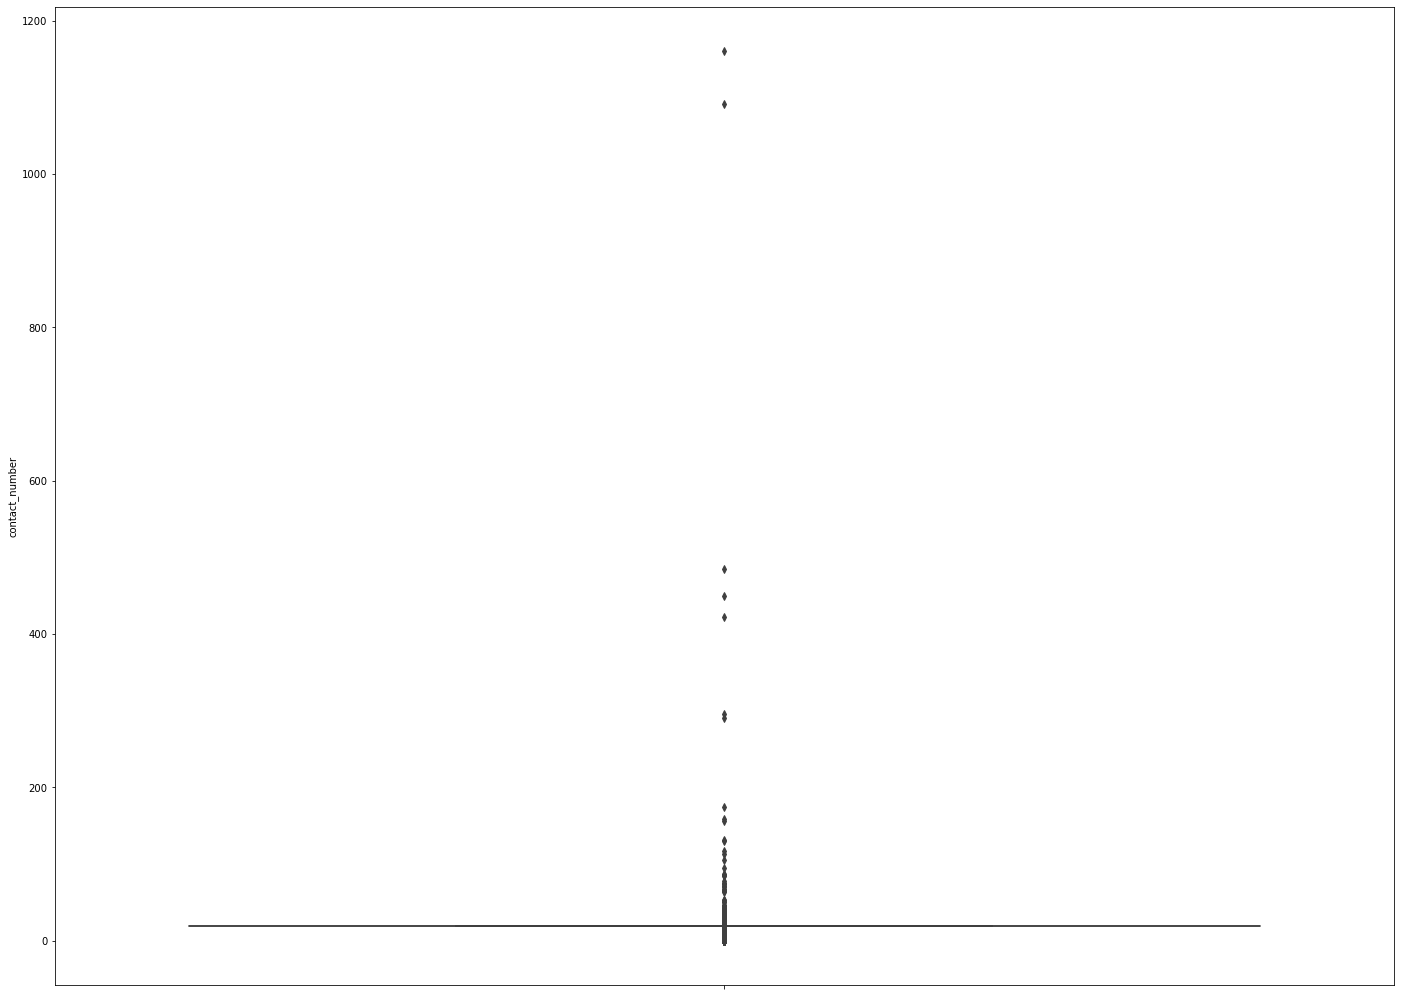

In [16]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(24,18)
sn.boxplot(data=patientdata, y="contact_number")


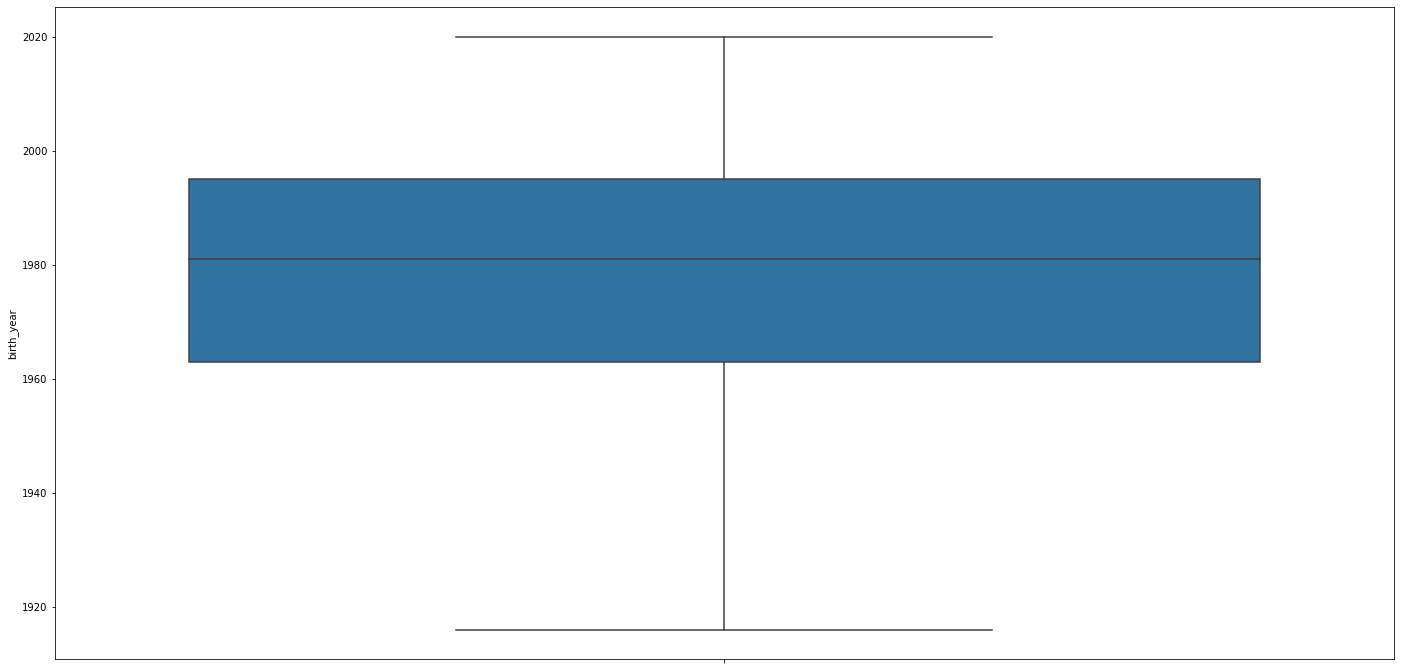

In [17]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(24,12)
sn.boxplot(data=patientdata, y="birth_year")


删除小于contact_number小于0，以及birthyear大于2020，小于1920的数据

In [18]:
patientdata.drop(patientdata[patientdata['contact_number']<0].index)
patientdata.drop(patientdata[(patientdata['birth_year']<1920)|(patientdata['birth_year']>2020)].index)

,sex,birth_year,country,province,city,disease,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,education_healthy_facilities,latitude,longitude,academy_ratio,elderly_population_ratio
0,male,1964.0,Korea,Seoul,Gangseo-gu,None,overseas inflow,None,75.0,2020-01-22,2020-01-23,2020-02-05,None,released,38,35.212424,128.980680,1.43,11.84
1,male,1987.0,Korea,Seoul,Jungnang-gu,None,overseas inflow,None,31.0,None,2020-01-30,2020-03-02,None,released,55,37.606832,127.092656,0.70,16.65
2,male,1964.0,Korea,Seoul,Jongno-gu,None,contact with patient,2.002e+09,17.0,None,2020-01-30,2020-02-19,None,released,33,37.572999,126.979189,1.71,18.27
3,male,1991.0,Korea,Seoul,Mapo-gu,None,overseas inflow,None,9.0,2020-01-26,2020-01-30,2020-02-15,None,released,48,37.566283,126.901644,1.83,14.05
4,female,1992.0,Korea,Seoul,Seongbuk-gu,None,contact with patient,1e+09,2.0,None,2020-01-31,2020-02-24,None,released,84,37.589562,127.016700,1.02,16.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,female,1995.0,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,20.0,None,2020-03-24,None,None,isolated,240,33.488936,126.500423,1.53,15.10
3124,male,1995.0,United States,Jeju-do,Jeju-do,None,overseas inflow,None,23.0,None,2020-03-24,None,None,isolated,240,33.488936,126.500423,1.53,15.10
3125,female,1996.0,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,26.0,None,2020-03-25,None,None,isolated,240,33.488936,126.500423,1.53,15.10
3126,female,1995.0,Korea,Jeju-do,Jeju-do,None,overseas inflow,None,25.0,None,2020-03-27,None,None,isolated,240,33.488936,126.500423,1.53,15.10


数字编码，使用sklearn中的LabelEnconder对有优劣之分或次序关系的分类特征进行数字编码

In [19]:
#导入LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [20]:
column=['sex','country','province','city','infection_case','state']
for col in column:
    le=LabelEncoder()
    patientdata[col]=le.fit_transform(patientdata[col])


对patientinfo的各个特征进行可视化处理

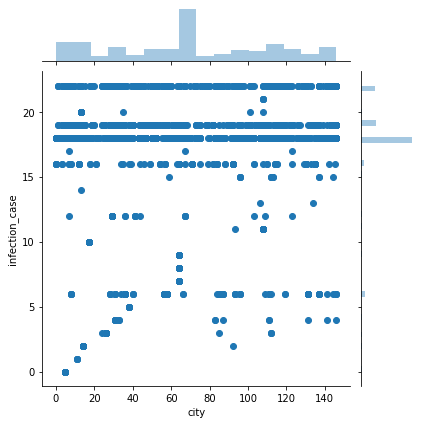

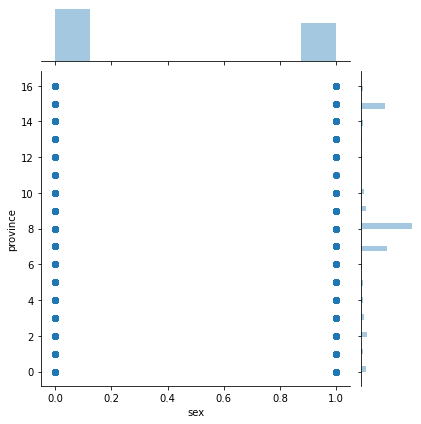

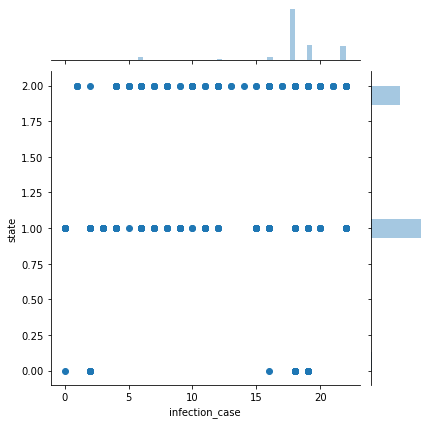

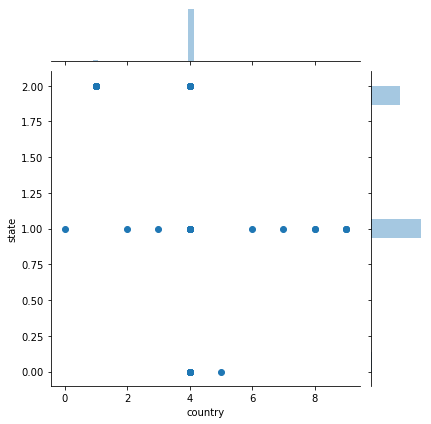

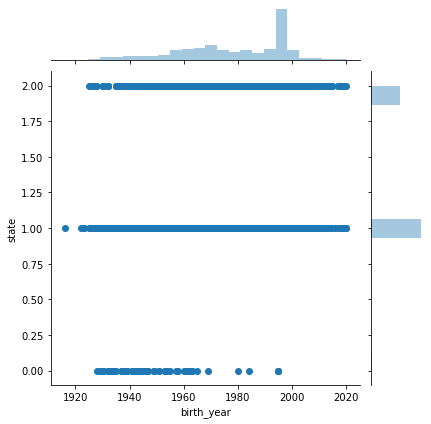

In [21]:
sn.jointplot(x="city", y="infection_case", data=patientdata, kind="scatter")
sn.jointplot(x="sex", y="province", data=patientdata, kind="scatter")
sn.jointplot(x="infection_case", y="state", data=patientdata, kind="scatter")
sn.jointplot(x="country", y="state", data=patientdata, kind="scatter")
sn.jointplot(x="birth_year", y="state", data=patientdata, kind="scatter")

In [22]:
# 对'time','Timegender','Timeage','Timeprovince'进行可视化处理

读取数据集'Time','Timegender','Timeage','Timeprovince'

In [23]:
time=pd.read_csv("D:360Downloads\Time.csv")    
timeage=pd.read_csv("D:360Downloads\TimeAge.csv")
timegender=pd.read_csv("D:360Downloads\TimeGender.csv") 
timeprovince=pd.read_csv("D:360Downloads\TimeProvince.csv") 

In [24]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


对于time文件里的各项属性进行可视化处理

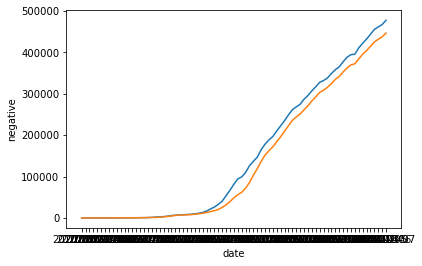

In [25]:
ax=sn.lineplot(x='date',y='test',data=time)
ax=sn.lineplot(x='date',y='negative',data=time)


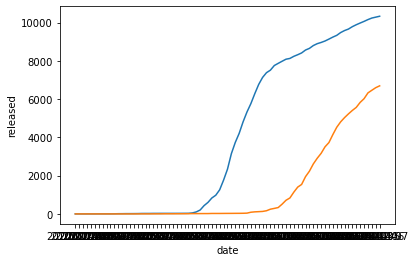

In [26]:
ax=sn.lineplot(x='date',y='confirmed',data=time)
ax=sn.lineplot(x='date',y='released',data=time)


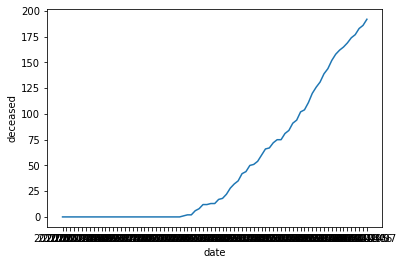

In [27]:
ax=sn.lineplot(x='date',y='deceased',data=time)

再对timeage的数据进行可视化处理

In [28]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


对'confirmed'可视化

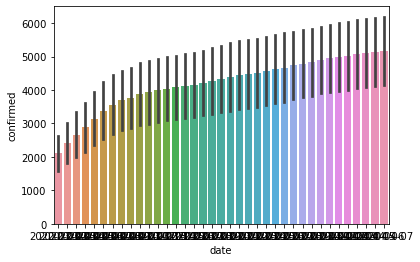

In [59]:
# age = timeage['age']
# ax =sn.distplot(age) 
ax=sn.barplot(x='date',y='confirmed',data=timegender)

对deceased可视化

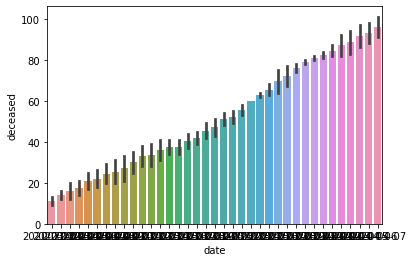

In [60]:
# deceased = timeage['deceased']
# ax =sn.distplot(deceased) 
ax=sn.barplot(x='date',y='deceased',data=timegender)

对timegender进行可视化处理

对'confirmed'和'sex'进行关联可视化

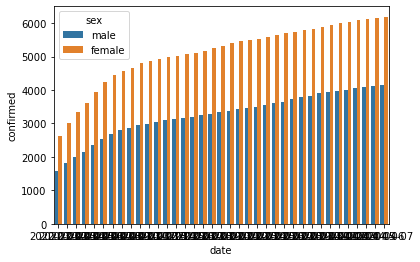

In [61]:
# time = timegender['sex']
# ax =sn.distplot(time) 
ax=sn.barplot(x='date',y='confirmed',hue = 'sex',data=timegender)

从上表中看出女性确诊数要多于男性

对timeprovince进行可视化处理

对confirmed和province进行关联可视化处理

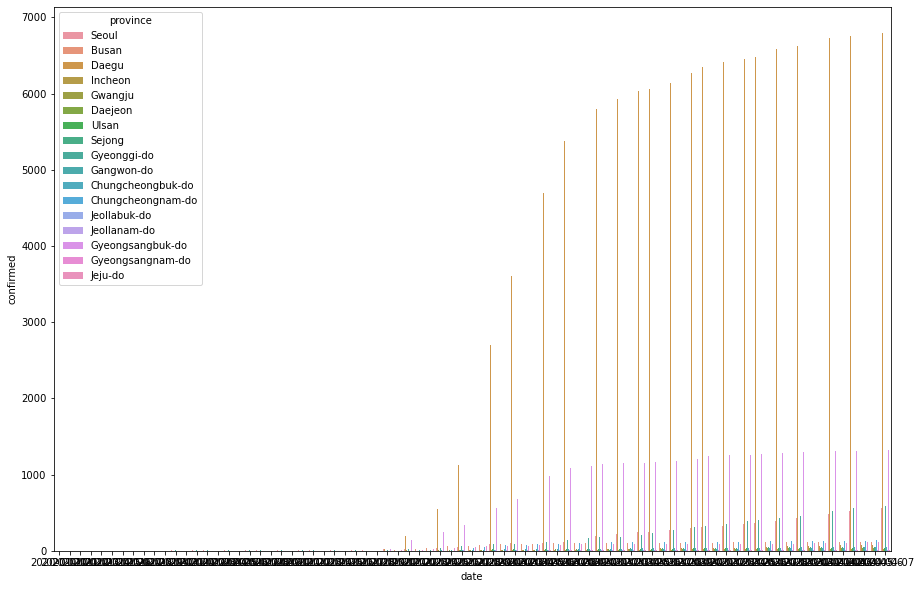

In [62]:
plt.figure(figsize=(15, 10))
ax=sn.barplot(x='date',y='confirmed',hue = 'province',data=timeprovince)

对released和province进行关联可视化处理

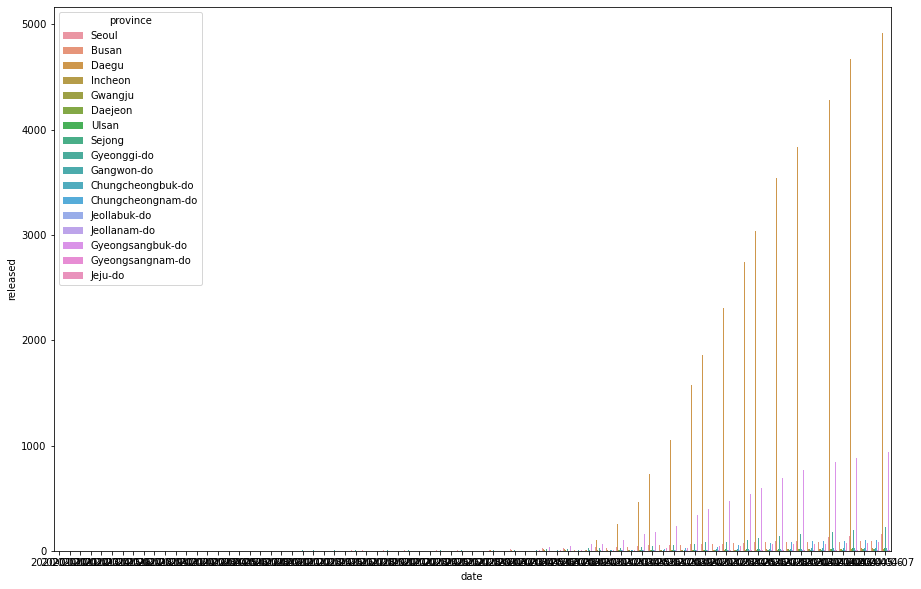

In [63]:
plt.figure(figsize=(15, 10))
ax=sn.barplot(x='date',y='released',hue = 'province',data=timeprovince)

对deceased和province进行关联可视化处理

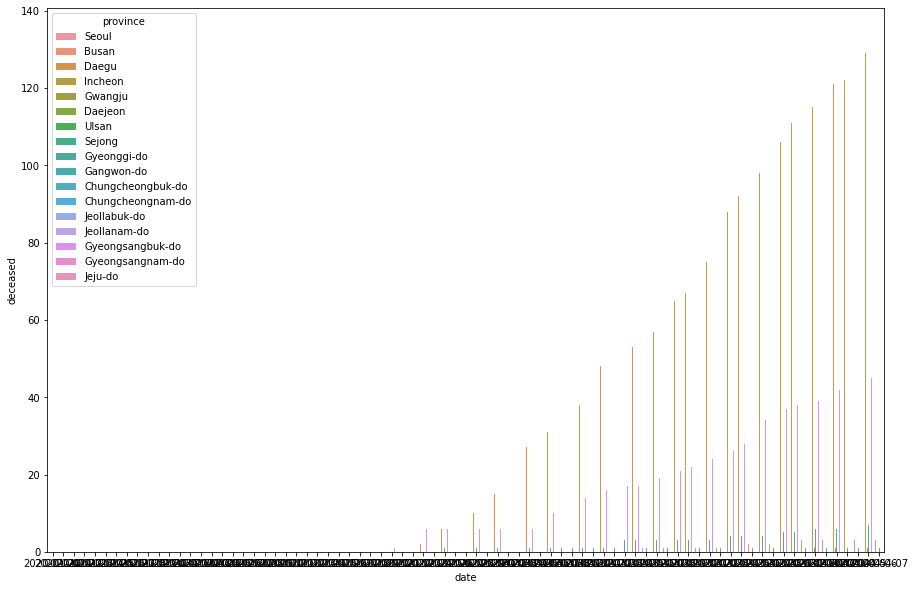

In [64]:
plt.figure(figsize=(15, 10))
ax=sn.barplot(x='date',y='deceased',hue = 'province',data=timeprovince)

## Task2    预测病人的恢复时间

首先，删除released_date为none的数据

In [29]:
list=patientdata[(patientdata['released_date']=='None')].index.tolist()
patientdata=patientdata.drop(list)

对confirmed_date和released_date列提取新特征，组成新的列

In [30]:
from datetime import datetime
patientdata['confirmed_date'].astype(str)
patientdata["confirm_year"] = patientdata.confirmed_date.apply(lambda x: x.split()[0].split("-")[0])
patientdata["confrim_month"] = patientdata.confirmed_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month)
patientdata["confrim_day"] = patientdata.confirmed_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").day)
patientdata['released_date'].astype(str)
patientdata["released_year"] = patientdata.released_date.apply(lambda x: x.split()[0].split("-")[0])
patientdata["released_month"] = patientdata.released_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month)
patientdata["released_day"] = patientdata.released_date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").day)
patientdata


,sex,birth_year,country,province,city,disease,infection_case,infected_by,contact_number,symptom_onset_date,...,latitude,longitude,academy_ratio,elderly_population_ratio,confirm_year,confrim_month,confrim_day,released_year,released_month,released_day
0,1,1964.0,4,15,36,None,22,None,75.000000,2020-01-22,...,35.212424,128.980680,1.43,11.84,2020,1,23,2020,2,5
1,1,1987.0,4,15,85,None,22,None,31.000000,None,...,37.606832,127.092656,0.70,16.65,2020,1,30,2020,3,2
2,1,1964.0,4,15,83,None,18,2.002e+09,17.000000,None,...,37.572999,126.979189,1.71,18.27,2020,1,30,2020,2,19
3,1,1991.0,4,15,86,None,22,None,9.000000,2020-01-26,...,37.566283,126.901644,1.83,14.05,2020,1,30,2020,2,15
4,0,1992.0,4,15,112,None,18,1e+09,2.000000,None,...,37.589562,127.016700,1.02,16.15,2020,1,31,2020,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,1,1971.0,4,9,39,None,19,None,18.908319,None,...,34.880519,128.621216,1.76,10.22,2020,3,11,2020,3,14
3119,1,1998.0,4,11,78,None,19,None,87.000000,None,...,33.488936,126.500423,1.53,15.10,2020,2,20,2020,3,23
3120,0,1998.0,4,11,78,None,19,None,84.000000,None,...,33.488936,126.500423,1.53,15.10,2020,2,22,2020,3,7
3121,0,1972.0,4,11,146,None,19,None,21.000000,None,...,0.000000,0.000000,0.00,0.00,2020,3,2,2020,3,15


计算confirm_date 和released_date 之间的日子，形成新的列recoverytime

定义函数计算recovertime

In [31]:
def cal_Days(am,ad,fm,fd):
    if am==2 and fm==2:
        return ad-fd
    elif am==3 and fm==2:
        return ad-fd+29
    elif am==4 and fm==2:
        return ad-fd+29+31
    elif am==3 and fm==3:
        return ad-fd
    elif am==4 and fm==3:
        return ad-fd+31
    elif am==4 and fm==4:
        return ad-fd
    elif am==1 and fm==1:
        return ad-fd
    elif am==2 and fm==1:
        return ad-fd+31
    elif am==3 and fm==1:
        return ad-fd+31+29
    elif am==4 and fm==1:
        return ad-fd+31+29+31

In [32]:
patientdata['recovery_time']=patientdata.apply(lambda x: cal_Days(x['released_month'],x['released_day'],x['confrim_month'],x['confrim_day']),axis=1)

我们使用seaborn中的热力图来表明recovery_time和其他特征的关系，这里我们绘制recovery_time vs sex，birthyear，province，country，city，
infection_case的热力图


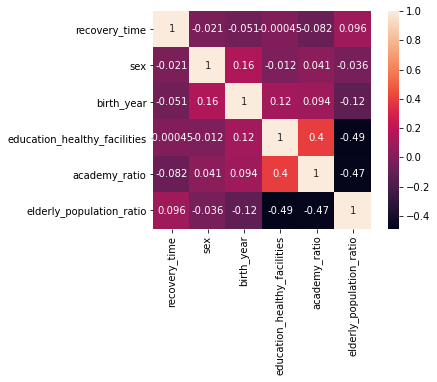

In [33]:
corrMat = patientdata[["recovery_time", "sex","birth_year",'education_healthy_facilities','academy_ratio','elderly_population_ratio']].corr()
sn.heatmap(corrMat, annot=True, square=True)

我们可以看出academy_ratio和education_healthy_ratio之间有很高的相关性，我们关注的是recovery_time和其他各个特征之间的相关性
我们看出recovery_time和elderly_population_ratio正相关，和academy_ratio,education_healthy_facilities,birthyear


接下来通过这几种特征和线性回归预测病人的恢复时间，首先去除其他无用的特征

In [34]:
X=patientdata[['sex','birth_year','education_healthy_facilities','academy_ratio','elderly_population_ratio']]
Ylabel=patientdata['recovery_time']
X.describe()

,sex,birth_year,education_healthy_facilities,academy_ratio,elderly_population_ratio
count,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.405708,1979.910296,111.426096,1.497105,15.302691
std,0.491279,18.239453,56.889419,0.451158,4.859581
min,0.000000,1925.000000,0.000000,0.000000,0.000000
25%,0.000000,1966.000000,92.000000,1.340000,12.770000
50%,0.000000,1983.000000,102.000000,1.340000,16.180000
75%,1.000000,1995.000000,111.000000,1.760000,16.180000
max,1.000000,2020.000000,310.000000,4.180000,35.260000


训练集，测试集划分，比例为70，30

In [35]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Ylabel, test_size = 0.3, random_state=42)

In [36]:
# 构建线性回归模型
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

In [37]:
X.isnull().sum()

sex                             0
birth_year                      0
education_healthy_facilities    0
academy_ratio                   0
elderly_population_ratio        0
dtype: int64

In [38]:
# 用训练集训练模型
Model.fit(X= train_x, y = train_y)

# 模型预测
preds = Model.predict(X= test_x)

In [39]:
from sklearn.metrics import mean_squared_error
print("线性回归的标准差RMSE:", mean_squared_error(test_y, preds))

线性回归的标准差RMSE: 54.342400462634934


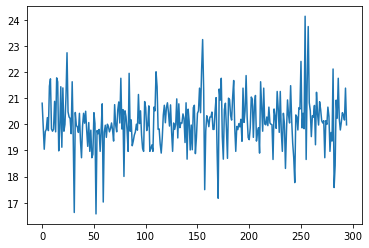

In [40]:
#结果可视化
plt.plot(preds)

和测试集的recovery_time相比较

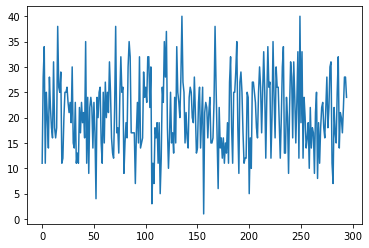

In [41]:
plt.plot(np.array(test_y))

绘制recovery_time vs birth_year  education_healthy_facilities  academy_ratio  elderly_population_ratio的回归图

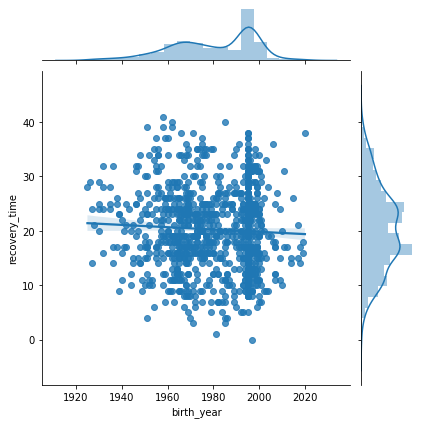

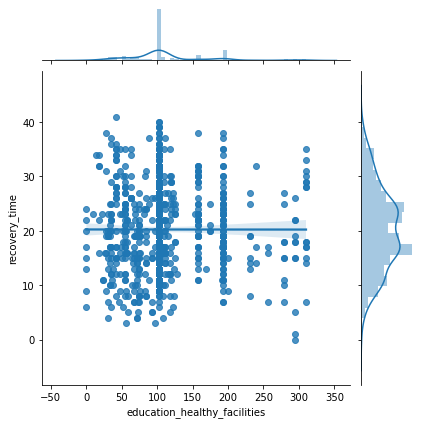

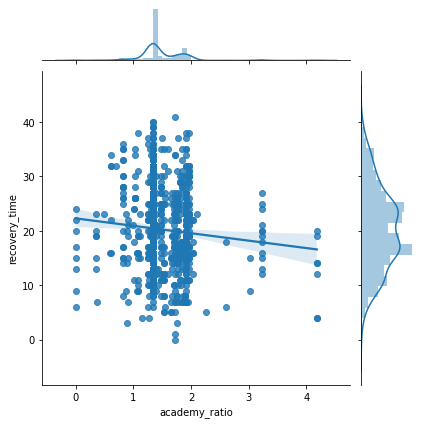

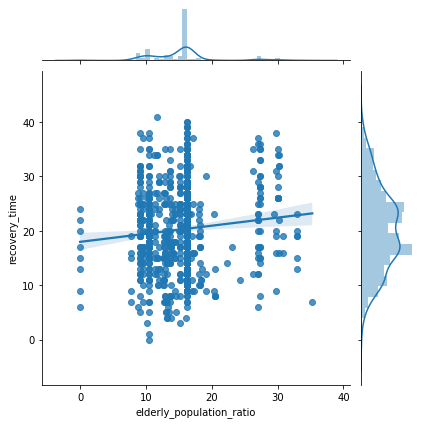

In [42]:
sn.jointplot(x="birth_year", y="recovery_time", data=patientdata, kind="reg")
sn.jointplot(x="education_healthy_facilities", y="recovery_time", data=patientdata, kind="reg")
sn.jointplot(x="academy_ratio", y="recovery_time", data=patientdata, kind="reg")
sn.jointplot(x="elderly_population_ratio", y="recovery_time", data=patientdata, kind="reg")

绘制残差图来诊断回归模型的效果，如果随机点分布在0的附近，就说明回归的效果好

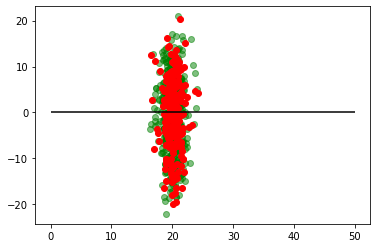

In [43]:
plt.scatter(Model.predict(train_x), Model.predict(train_x) - train_y, c="g", alpha=0.5)
plt.scatter(Model.predict(test_x), Model.predict(test_x) - test_y, c="r")
plt.hlines(y=0, xmin=0, xmax=50)


# task 3  城市的风险水平评估

## 1. 数据预处理

读入数据

In [86]:
Region=pd.read_csv("D:360Downloads\Region.csv")
TimeProvince=pd.read_csv("D:360Downloads\TimeProvince.csv")
PatientInfo=pd.read_csv("D:360Downloads\PatientInfo.csv")
Case=pd.read_csv("D:360Downloads\Case.csv")s

SyntaxError: invalid syntax (<ipython-input-86-e04ca505335d>, line 4)

只获取最后一天的数据

In [87]:
list = TimeProvince[(TimeProvince['date']!='2020-04-07')].index.tolist()
TimeProvince = TimeProvince.drop(list)
TimeProvince.head(5)

,date,time,province,confirmed,released,deceased
1326,2020-04-07,0,Seoul,567,164,0
1327,2020-04-07,0,Busan,123,91,3
1328,2020-04-07,0,Daegu,6794,4918,134
1329,2020-04-07,0,Incheon,80,27,0
1330,2020-04-07,0,Gwangju,27,15,0


对`Region`文件进行预处理，删除经纬度、编码，添加确诊和死亡数

In [88]:
# PatientCity = Region.dropcolomn(Region['latitude'].index.tolist())

PatientCity = Region.drop(labels='latitude',axis=1, index=None, columns=None, inplace=False)
PatientCity = PatientCity.drop(labels='longitude',axis=1, index=None, columns=None, inplace=False)
PatientCity = PatientCity.drop(labels='code',axis=1, index=None, columns=None, inplace=False)
for i in PatientCity.index:
    if PatientCity.loc[i,'province'] == PatientCity.loc[i,'city']:
        if (PatientCity.loc[i,'province'] == 'Sejong')or(PatientCity.loc[i,'province'] == 'Jeju-do')or(PatientCity.loc[i,'province'] == 'Korea'):
            continue
        PatientCity = PatientCity.drop(labels=None,axis=0, index=[i], columns=None, inplace=False)
PatientCity['oversea'] = 0
PatientCity['group'] = 0
PatientCity['confirmed'] = 0
PatientCity['deceased'] = 0
# PatientCity.loc[PatientCity.shape[0]] = [0 for n in range(PatientCity.shape[1])]
# PatientCity.loc[244,'city'] = 'etc'
PatientCity.head(5)

,province,city,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,oversea,group,confirmed,deceased
1,Seoul,Gangnam-gu,33,38,0,4.18,13.17,4.3,3088,0,0,0,0
2,Seoul,Gangdong-gu,27,32,0,1.54,14.55,5.4,1023,0,0,0,0
3,Seoul,Gangbuk-gu,14,21,0,0.67,19.49,8.5,628,0,0,0,0
4,Seoul,Gangseo-gu,36,56,1,1.17,14.39,5.7,1080,0,0,0,0
5,Seoul,Gwanak-gu,22,33,1,0.89,15.12,4.9,909,0,0,0,0


创建map 用于匹配`PatientCity`里的行号

In [89]:
map = {}
for index,row in PatientCity.iterrows():
    city = row['city']
    map[city] = index

通过patientinfo获得每个城市的确诊死亡人数

In [90]:
for index, row in PatientInfo.iterrows():
    city = row["city"]
    infect = row['infection_case']
    if city is np.nan:
        continue
    if  city == 'etc':
        continue
    ind = map[city]
    if infect == 'overseas inflow':
        PatientCity.loc[ind,'oversea'] = PatientCity.loc[ind,'oversea'] + 1
    PatientCity.loc[ind,'confirmed'] = PatientCity.loc[ind,'confirmed'] + 1
    if row["deceased_date"] is not np.nan:
        PatientCity.loc[ind,'deceased'] = PatientCity.iloc[ind]['deceased'] + 1

        
for index, row in Case.iterrows():
    city = row["city"]
    Group = row['group']
    num = row['confirmed'];
    if city is np.nan:
        continue
    if  city == 'etc':
        continue
    if  city == 'from other city':
        continue
    if  city == '-':
        continue
    if  city == 'Jin-gu':
        city = 'Busanjin-gu'
    ind = map[city]
    if Group == True:
        PatientCity.loc[ind,'group'] = PatientCity.loc[ind,'group'] + num;
PatientCity.head()

,province,city,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,oversea,group,confirmed,deceased
1,Seoul,Gangnam-gu,33,38,0,4.18,13.17,4.3,3088,31,0,53,0
2,Seoul,Gangdong-gu,27,32,0,1.54,14.55,5.4,1023,8,0,13,0
3,Seoul,Gangbuk-gu,14,21,0,0.67,19.49,8.5,628,1,0,5,0
4,Seoul,Gangseo-gu,36,56,1,1.17,14.39,5.7,1080,0,0,0,0
5,Seoul,Gwanak-gu,22,33,1,0.89,15.12,4.9,909,10,0,41,0


用热力图判断相关性

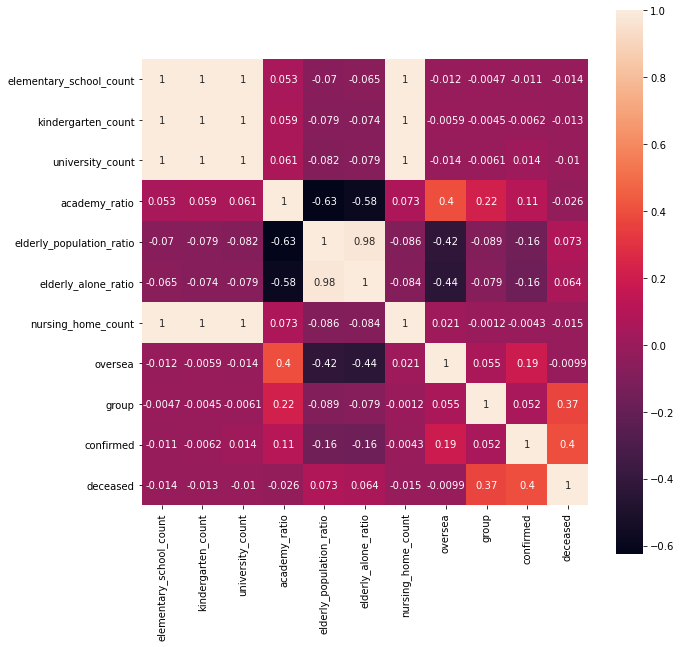

In [91]:
plt.figure(figsize=(10,10))
corrMat = PatientCity[["elementary_school_count", 
                       "kindergarten_count",
                       "university_count",
                       'academy_ratio',
                       'elderly_population_ratio',
                       'elderly_alone_ratio',
                       'nursing_home_count',
                       'oversea',
                       'group',
                       'confirmed',
                       'deceased']].corr()
sn.heatmap(corrMat, annot=True, square=True)

发现：

`"elementary_school_count", "kindergarten_count","university_count"与'nursing_home_count'`有较高的相关性

`'elderly_population_ratio','elderly_alone_ratio'`之间有较高的相关性。

因此

将`"elementary_school_count", "kindergarten_count","university_count"与'nursing_home_count'`四个只保留`nursing_home_count`;

`'elderly_population_ratio','elderly_alone_ratio'`只保留`elderly_population_ratio`

In [92]:
PatientCityWithProvince = PatientCity
PatientCity = PatientCity.drop(labels='province',axis=1, index=None, columns=None, inplace=False)
PatientCity.head(10)

,city,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,oversea,group,confirmed,deceased
1,Gangnam-gu,33,38,0,4.18,13.17,4.3,3088,31,0,53,0
2,Gangdong-gu,27,32,0,1.54,14.55,5.4,1023,8,0,13,0
3,Gangbuk-gu,14,21,0,0.67,19.49,8.5,628,1,0,5,0
4,Gangseo-gu,36,56,1,1.17,14.39,5.7,1080,0,0,0,0
5,Gwanak-gu,22,33,1,0.89,15.12,4.9,909,10,0,41,0
6,Gwangjin-gu,22,33,3,1.16,13.75,4.8,723,6,0,7,0
7,Guro-gu,26,34,3,1.00,16.21,5.7,741,3,138,34,0
8,Geumcheon-gu,18,19,0,0.96,16.15,6.7,475,1,0,13,0
9,Nowon-gu,42,66,6,1.39,15.40,7.4,952,5,0,23,0
10,Dobong-gu,23,26,1,0.95,17.89,7.2,485,4,0,7,0


In [93]:
PatientCityWithProvince = PatientCityWithProvince.drop(labels='elementary_school_count',axis=1, index=None, columns=None, inplace=False)
PatientCityWithProvince = PatientCityWithProvince.drop(labels='kindergarten_count',axis=1, index=None, columns=None, inplace=False)
PatientCityWithProvince = PatientCityWithProvince.drop(labels='university_count',axis=1, index=None, columns=None, inplace=False)
PatientCityWithProvince = PatientCityWithProvince.drop(labels='elderly_alone_ratio',axis=1, index=None, columns=None, inplace=False)
PatientCityWithProvince.head(10)

,province,city,academy_ratio,elderly_population_ratio,nursing_home_count,oversea,group,confirmed,deceased
1,Seoul,Gangnam-gu,4.18,13.17,3088,31,0,53,0
2,Seoul,Gangdong-gu,1.54,14.55,1023,8,0,13,0
3,Seoul,Gangbuk-gu,0.67,19.49,628,1,0,5,0
4,Seoul,Gangseo-gu,1.17,14.39,1080,0,0,0,0
5,Seoul,Gwanak-gu,0.89,15.12,909,10,0,41,0
6,Seoul,Gwangjin-gu,1.16,13.75,723,6,0,7,0
7,Seoul,Guro-gu,1.00,16.21,741,3,138,34,0
8,Seoul,Geumcheon-gu,0.96,16.15,475,1,0,13,0
9,Seoul,Nowon-gu,1.39,15.40,952,5,0,23,0
10,Seoul,Dobong-gu,0.95,17.89,485,4,0,7,0


导入数据

In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

riskLevels = PatientCity.drop(labels='elementary_school_count',axis=1, index=None, columns=None, inplace=False)
riskLevels = riskLevels.drop(labels='kindergarten_count',axis=1, index=None, columns=None, inplace=False)
riskLevels = riskLevels.drop(labels='university_count',axis=1, index=None, columns=None, inplace=False)
riskLevels = riskLevels.drop(labels='elderly_alone_ratio',axis=1, index=None, columns=None, inplace=False)

df=riskLevels
grain_variety=df['city']
del df['city']
df.head()

,academy_ratio,elderly_population_ratio,nursing_home_count,oversea,group,confirmed,deceased
1,4.18,13.17,3088,31,0,53,0
2,1.54,14.55,1023,8,0,13,0
3,0.67,19.49,628,1,0,5,0
4,1.17,14.39,1080,0,0,0,0
5,0.89,15.12,909,10,0,41,0


数据标准化和kmeans分析

In [95]:
samples=df.values
#标准化
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler,kmeans)
pipeline.fit(samples)#训练模型
labels=pipeline.predict(samples)#预测
df=pd.DataFrame({'labels':labels,'city':grain_variety})
ct=pd.crosstab(df['labels'],df['city'])
ct

city,Andong-si,Ansan-si,Anseong-si,Anyang-si,Asan-si,Boeun-gun,Bonghwa-gun,Boryeong-si,Boseong-gun,Buan-gun,...,Yeongju-si,Yeongwol-gun,Yeongyang-gun,Yeonje-gu,Yeonsu-gu,Yeosu-si,Yesan-gun,Yongin-si,Yongsan-gu,Yuseong-gu
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1,1,1,...,1,1,1,0,0,0,1,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,0,1,1,1


In [100]:
# 获取某一行的方法：
def getRow(a,data):
    return data[a:a+1]

选择这些列表里三个不同`label`的`city`查看

结果如下:

label==2

In [96]:
for index,row in PatientCity.iterrows():
    if row['city'] == 'Ansan-si':
        print(row)

city                        Ansan-si
elementary_school_count           54
kindergarten_count                94
university_count                   4
academy_ratio                   1.49
elderly_population_ratio       10.35
elderly_alone_ratio              4.6
nursing_home_count              1024
oversea                            3
group                              0
confirmed                         16
deceased                           0
Name: 97, dtype: object


label==1

In [97]:
for index,row in PatientCity.iterrows():
    if row['city'] == 'Nam-gu':
        print(row)

city                        Nam-gu
elementary_school_count         21
kindergarten_count              27
university_count                 4
academy_ratio                 1.24
elderly_population_ratio     19.13
elderly_alone_ratio            7.9
nursing_home_count             475
oversea                          0
group                            0
confirmed                        0
deceased                         0
Name: 30, dtype: object
city                        Nam-gu
elementary_school_count         11
kindergarten_count              15
university_count                 2
academy_ratio                 0.85
elderly_population_ratio     22.49
elderly_alone_ratio           10.4
nursing_home_count             345
oversea                          0
group                            0
confirmed                        0
deceased                         0
Name: 44, dtype: object
city                        Nam-gu
elementary_school_count         23
kindergarten_count              44
univers

label==1

In [98]:
for index,row in PatientCity.iterrows():
    if row['city'] == 'Bonghwa-gun':
        print(row)

city                        Bonghwa-gun
elementary_school_count              14
kindergarten_count                   17
university_count                      0
academy_ratio                      0.37
elderly_population_ratio          35.26
elderly_alone_ratio                  20
nursing_home_count                   47
oversea                               0
group                                68
confirmed                            71
deceased                              1
Name: 207, dtype: object


从上边的例子里边 可以看出来，

`label` == 2 时是风险最低的情况；

`label` == 0 时是风险中度的情况

`label` == 1 是的风险最高的情况

**高风险地区：**

In [101]:
high = getRow(1,ct)
city = []
cols=[x for i,x in enumerate(high.columns) if high.iat[0,i]==0]
high=high.drop(cols,axis=1) #利用drop方法将含有特定数值的列删除
print("高风险地区:")

for i,x in enumerate(high.columns):
    city.append(x)
output = PatientCityWithProvince
for index,row in output.iterrows():
    if row['city'] not in city:
        output = output.drop(index,axis=0)
for index,row in output.iterrows():
    if row['confirmed'] > 20:
        print(row['province'],row['city'])

高风险地区:
Daejeon Seo-gu
Ulsan Nam-gu
Ulsan Jung-gu
Gyeongsangbuk-do Gimcheon-si
Gyeongsangbuk-do Uiseong-gun


**中风险地区：**

In [102]:
mid = getRow(0,ct)
city = []
cols=[x for i,x in enumerate(mid.columns) if mid.iat[0,i]==0]
mid=mid.drop(cols,axis=1) #利用drop方法将含有特定数值的列删除
print("中风险地区:")
for i,x in enumerate(mid.columns):
    city.append(x)
output = PatientCityWithProvince
for index,row in output.iterrows():
    if row['city'] not in city:
        output = output.drop(index,axis=0)
for index,row in output.iterrows():
    print(row['province'],row['city'])

中风险地区:
Busan Nam-gu
Daegu Nam-gu
Gwangju Nam-gu
Ulsan Nam-gu
Gyeonggi-do Namyangju-si
Gangwon-do Taebaek-si
Gyeongsangbuk-do Gyeongsan-si
Gyeongsangbuk-do Bonghwa-gun
Gyeongsangbuk-do Seongju-gun
Gyeongsangbuk-do Yeongcheon-si
Gyeongsangbuk-do Cheongdo-gun


**低风险地区：**

In [104]:
low = getRow(2,ct)
city = []
cols=[x for i,x in enumerate(low.columns) if low.iat[0,i]==0]
low=low.drop(cols,axis=1) #利用drop方法将含有特定数值的列删除
print("低风险地区:")
for i,x in enumerate(low.columns):
    city.append(x)
output = PatientCityWithProvince
for index,row in output.iterrows():
    if row['city'] not in city:
        output = output.drop(index,axis=0)
for index,row in output.iterrows():
    print(row['province'],row['city'])

低风险地区:
Seoul Gangnam-gu
Seoul Gangdong-gu
Seoul Gangseo-gu
Seoul Gwanak-gu
Seoul Gwangjin-gu
Seoul Guro-gu
Seoul Geumcheon-gu
Seoul Nowon-gu
Seoul Dobong-gu
Seoul Dongdaemun-gu
Seoul Dongjak-gu
Seoul Mapo-gu
Seoul Seodaemun-gu
Seoul Seocho-gu
Seoul Seongdong-gu
Seoul Seongbuk-gu
Seoul Songpa-gu
Seoul Yangcheon-gu
Seoul Yeongdeungpo-gu
Seoul Yongsan-gu
Seoul Eunpyeong-gu
Seoul Jongno-gu
Seoul Jung-gu
Seoul Jungnang-gu
Busan Gangseo-gu
Busan Geumjeong-gu
Busan Gijang-gun
Busan Nam-gu
Busan Dong-gu
Busan Dongnae-gu
Busan Busanjin-gu
Busan Buk-gu
Busan Saha-gu
Busan Seo-gu
Busan Suyeong-gu
Busan Yeonje-gu
Busan Jung-gu
Busan Haeundae-gu
Daegu Nam-gu
Daegu Dalseo-gu
Daegu Dalseong-gun
Daegu Dong-gu
Daegu Buk-gu
Daegu Seo-gu
Daegu Suseong-gu
Daegu Jung-gu
Gwangju Gwangsan-gu
Gwangju Nam-gu
Gwangju Dong-gu
Gwangju Buk-gu
Gwangju Seo-gu
Incheon Gyeyang-gu
Incheon Michuhol-gu
Incheon Namdong-gu
Incheon Dong-gu
Incheon Bupyeong-gu
Incheon Seo-gu
Incheon Yeonsu-gu
Incheon Jung-gu
Daejeon Daedeok-

## Task4 预测感染人数

我们先来绘制疫情确诊人数的走势图

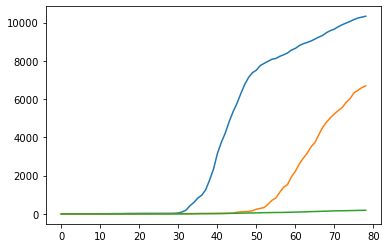

In [44]:
plt.plot(time['confirmed'],label='confirmed')
plt.plot(time['released'],label='released')
plt.plot(time['deceased'],label='deceased')


我们考虑用逻辑斯蒂函数来预测

In [45]:
#定义逻辑斯蒂函数
def logistic_function(p,t):
    k,b=p
    a=0.1
    
    value=np.exp(-a*(t-b))
    return k/(1+value)
#定义误差函数
def error_f(p,t,y):
    return logistic_function(p,t)-y
time.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       79 non-null     object
 1   time       79 non-null     int64 
 2   test       79 non-null     int64 
 3   negative   79 non-null     int64 
 4   confirmed  79 non-null     int64 
 5   released   79 non-null     int64 
 6   deceased   79 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.4+ KB


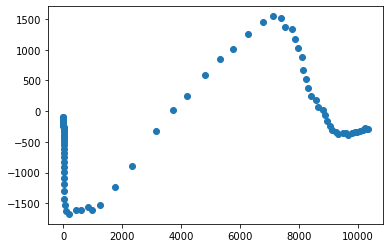

In [46]:
from scipy.optimize import leastsq
#参数初始值
logistic_p0=[10000,20]
t=np.array([i+1 for i in range(79)])
y=time['confirmed'].values
#利用最小二乘法求解参数
logistic_paramtr=leastsq(error_f,logistic_p0,args=(t,y))
p=logistic_paramtr[0]
#利用我们定义的逻辑斯蒂函数进行预测
predict_data=logistic_function(p,t)
predict_data
#预测的误差
error=y-predict_data
error
#绘制误差的散点图
plt.scatter(y,error)


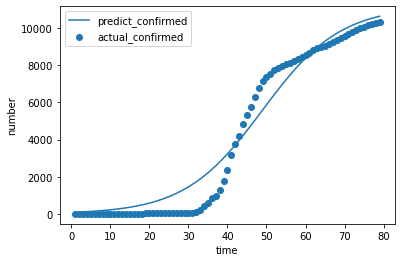

In [47]:
#绘图
plt.scatter(t,y,label='actual_confirmed')
plt.plot(t,predict_data,label='predict_confirmed')
plt.xlabel('time')
plt.ylabel('number')
plt.legend(loc='best')  
       

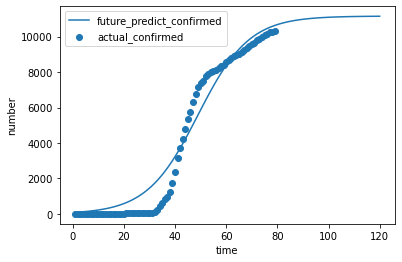

In [48]:
#预测未来疫情的走势
future_t=[i+1 for i in range(120) ]
future_predict=logistic_function(p,future_t)
future_predict
#绘图
#绘图
plt.scatter(t,y,label='actual_confirmed')
plt.plot(future_t,future_predict,label='future_predict_confirmed')
plt.xlabel('time')
plt.ylabel('number')
plt.legend(loc='best')  

预测接下来韩国的确诊人数

In [49]:
for i in range(81,119):
    print(future_predict[i])        
    

10760.21409500655
10796.652288496583
10829.836260428989
10860.03864093677
10887.512426223213
10912.491803741863
10935.19306332525
10955.815562195587
10974.542717779608
10991.54300745268
11006.970958800215
11020.968117766812
11033.663985233312
11045.176915189058
11055.614969819364
11065.076728571732
11073.652049658514
11081.422783552653
11088.463438884637
11094.841801795546
11100.619510278748
11105.852585383465
11110.591921383004
11114.883737151555
11118.76999106493
11122.288761757494
11125.474597043065
11128.358833251825
11130.969887156922
11133.333522570134
11135.473093581173
11137.409766304334
11139.16272088227
11140.749335382636
11142.1853531109
11143.485034753186
11144.661296657818
11145.725836463826


因此，预测韩国的疫情将于开始后的第120天结束，结束时的累计确诊量到达11145例

## 从经纬度找到感染的聚集点

In [50]:
patientdata.head()

,sex,birth_year,country,province,city,disease,infection_case,infected_by,contact_number,symptom_onset_date,...,longitude,academy_ratio,elderly_population_ratio,confirm_year,confrim_month,confrim_day,released_year,released_month,released_day,recovery_time
0,1,1964.0,4,15,36,None,22,None,75.0,2020-01-22,...,128.980680,1.43,11.84,2020,1,23,2020,2,5,13
1,1,1987.0,4,15,85,None,22,None,31.0,None,...,127.092656,0.70,16.65,2020,1,30,2020,3,2,32
2,1,1964.0,4,15,83,None,18,2.002e+09,17.0,None,...,126.979189,1.71,18.27,2020,1,30,2020,2,19,20
3,1,1991.0,4,15,86,None,22,None,9.0,2020-01-26,...,126.901644,1.83,14.05,2020,1,30,2020,2,15,16
4,0,1992.0,4,15,112,None,18,1e+09,2.0,None,...,127.016700,1.02,16.15,2020,1,31,2020,2,24,24


In [51]:
newpatientdata=patientdata[['latitude','longitude']]
newpatientdata.head()

,latitude,longitude
0,35.212424,128.980680
1,37.606832,127.092656
2,37.572999,126.979189
3,37.566283,126.901644
4,37.589562,127.016700


用kmeans对该数据进行聚类，找到各个聚集的中心点

Text(0, 0.5, 'longitude')

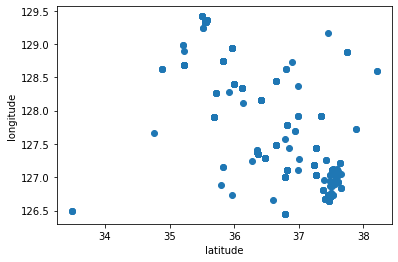

In [52]:
newpatientdata=newpatientdata[newpatientdata['latitude']!=0]

plt.scatter(newpatientdata['latitude'],newpatientdata['longitude'])
plt.xlabel('latitude')
plt.ylabel('longitude')

In [53]:
from sklearn.cluster import KMeans
#构造聚类器
estimator=KMeans(n_clusters=5)
estimator.fit(newpatientdata)
label_predict=estimator.labels_

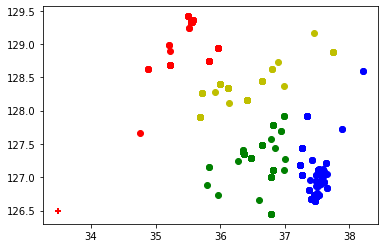

In [54]:
x0=newpatientdata[label_predict==0]
x1=newpatientdata[label_predict==1]
x2=newpatientdata[label_predict==2]
x3=newpatientdata[label_predict==3]
x4=newpatientdata[label_predict==4]
plt.scatter(x0['latitude'],x0['longitude'],c='r',label='x0')
plt.scatter(x1['latitude'],x1['longitude'],c='g',label='x1')
plt.scatter(x2['latitude'],x2['longitude'],c='b',label='x2')
plt.scatter(x3['latitude'],x3['longitude'],c='y',label='x3')
plt.scatter(x4['latitude'],x4['longitude'],c='r',marker='+',label='x4')

## task 判断当日确诊人数和当日的天气之间的关系，我们先选择韩国确诊人数最多的Gyeongsangbuk-do进行分析


In [105]:
timeprovince=pd.read_csv("D:360Downloads\TimeProvince.csv")
time_gye=timeprovince[timeprovince['province']=='Gyeongsangbuk-do']

weather=pd.read_csv("D:360Downloads\Weather.csv")
weather_gye=weather[weather['province']=='Gyeongsangbuk-do']
#定义函数，将每天Gyeongsangbuk-do的天气数据导入，
def getweather(dataframe,dR):
    
    dataframe['avg_temp']=0
    dataframe['min_temp']=0
    dataframe['max_temp']=0
    dataframe['max_wind_speed']=0
    dataframe['most_wind_direction']=0
    dataframe['avg_relative_humidity']=0
    for i in dataframe.index:
        for j in dR.index:
        
            if dataframe.loc[i,'date']==dR.loc[j,'date']:
                dataframe.loc[i,'avg_temp']=dR.loc[j,'avg_temp']
                dataframe.loc[i,'max_temp']=dR.loc[j,'max_temp']
                dataframe.loc[i,'min_temp']=dR.loc[j,'min_temp']
                dataframe.loc[i,'max_wind_speed']=dR.loc[j,'max_wind_speed']
                dataframe.loc[i,'most_wind_direction']=dR.loc[j,'most_wind_direction']
                dataframe.loc[i,'avg_relative_humidity']=dR.loc[j,'avg_relative_humidity']
           
    return dataframe         
getweather(time_gye,weather_gye)

<ipython-input-105-42a2d71124d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['avg_temp']=0
<ipython-input-105-42a2d71124d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['min_temp']=0
<ipython-input-105-42a2d71124d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,date,time,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction,avg_relative_humidity
14,2020-01-20,16,Gyeongsangbuk-do,0,0,0,3.6,-0.4,6.9,7.5,270.0,48.6
31,2020-01-21,16,Gyeongsangbuk-do,0,0,0,2.0,-1.9,7.5,4.8,180.0,51.6
48,2020-01-22,16,Gyeongsangbuk-do,0,0,0,5.2,-0.2,8.4,3.4,180.0,55.6
65,2020-01-23,16,Gyeongsangbuk-do,0,0,0,6.9,4.2,11.3,3.4,160.0,87.1
82,2020-01-24,16,Gyeongsangbuk-do,0,0,0,5.8,1.9,11.9,8.7,20.0,85.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2020-04-03,0,Gyeongsangbuk-do,1309,865,42,14.4,8.6,20.5,8.8,290.0,22.4
1289,2020-04-04,0,Gyeongsangbuk-do,1310,881,44,9.6,3.3,16.6,10.8,50.0,43.9
1306,2020-04-05,0,Gyeongsangbuk-do,1314,899,44,6.0,0.0,14.0,6.0,180.0,54.0
1323,2020-04-06,0,Gyeongsangbuk-do,1316,922,45,10.8,0.9,17.3,5.9,180.0,43.1


In [106]:
#再去除掉confirmed为0的数据，只查看有感染人数的数据
time_gye=time_gye[time_gye['confirmed']!=0]
new_time_gye=time_gye
new_time_gye.head()
for i in time_gye.index:
    if i>524:
        new_time_gye.loc[i,'confirmed']=time_gye.loc[i,'confirmed']-time_gye.loc[i-17,'confirmed']
new_time_gye.head()

d:\python\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,date,time,province,confirmed,released,deceased,avg_temp,min_temp,max_temp,max_wind_speed,most_wind_direction,avg_relative_humidity
524,2020-02-19,16,Gyeongsangbuk-do,2,1,0,3.8,-1.1,11.2,10.0,180.0,43.3
541,2020-02-20,16,Gyeongsangbuk-do,23,1,1,5.8,1.0,12.2,4.6,180.0,54.8
558,2020-02-21,16,Gyeongsangbuk-do,5,1,1,8.3,-0.2,15.2,5.7,180.0,60.1
575,2020-02-22,16,Gyeongsangbuk-do,140,1,3,7.9,2.7,11.1,9.9,270.0,44.3
592,2020-02-23,16,Gyeongsangbuk-do,30,1,3,5.2,-0.5,10.5,11.5,270.0,34.8


用热力图研究确诊数量和天气因素的相关性


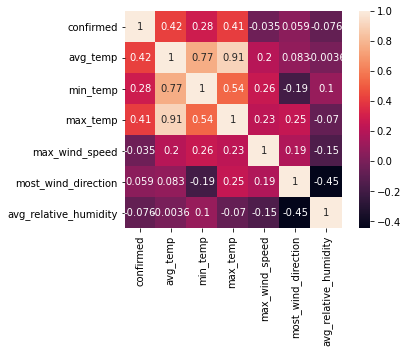

In [107]:
corrMat = new_time_gye[["confirmed", "avg_temp","min_temp",'max_temp','max_wind_speed','most_wind_direction','avg_relative_humidity']].corr()
sn.heatmap(corrMat, annot=True, square=True)

可以看出确诊数量和avg_temp,min_temp,max_temp，湿度，风速正相关。